In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
olympics_df = pd.read_csv('/Users/sabrina8654/Desktop/Olympics/athlete_events.csv')

In [3]:
noc_df = pd.read_csv('/Users/sabrina8654/Desktop/Olympics/noc_regions.csv')

In [4]:
noc_df.drop(columns=['notes'], inplace=True)

In [5]:
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Canada


In [6]:
olympics_df = pd.merge(olympics_df, noc_df, how='left', on='NOC')

In [7]:
olympics_df.drop(columns=['Team', 'ID', 'Event'], inplace=True)

In [8]:
cols = ['Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'region', 'Year', 'Season','Games', 'City', 'Host_Country', 'Sport', 'Medal']

In [9]:
olympics_df = olympics_df[cols]

In [10]:
olympics_df.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,1988,Winter,1988 Winter,Calgary,Canada,Speed Skating,NaN


In [11]:
olympics_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [12]:
olympics_df.shape

(271116, 14)

Part 1: Host Country - Sherry

In [13]:
olympics_df.loc[olympics_df.region=='USA', 'region'] = "United States"
olympics_df.loc[olympics_df.region=='UK', 'region'] = "United Kingdom"
olympics_df.loc[olympics_df['Host_Country']=='West Germany', 'Host_Country'] = "Germany"
olympics_df.loc[olympics_df['Host_Country']=='Soviet Union', 'Host_Country'] = "Russia"
olympics_df.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,1988,Winter,1988 Winter,Calgary,Canada,Speed Skating,NaN


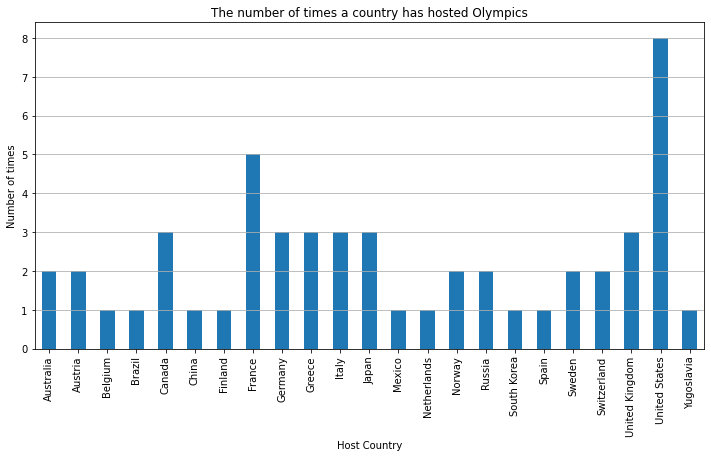

In [14]:
olympics_df.groupby('Host_Country').nunique('Games')['Games'].plot(kind='bar', title='The number of times a country has hosted Olympics', ylabel='Number of times',
         xlabel='Host Country', figsize=(12, 6)).grid(axis='y')

/Users/sabrina8654/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


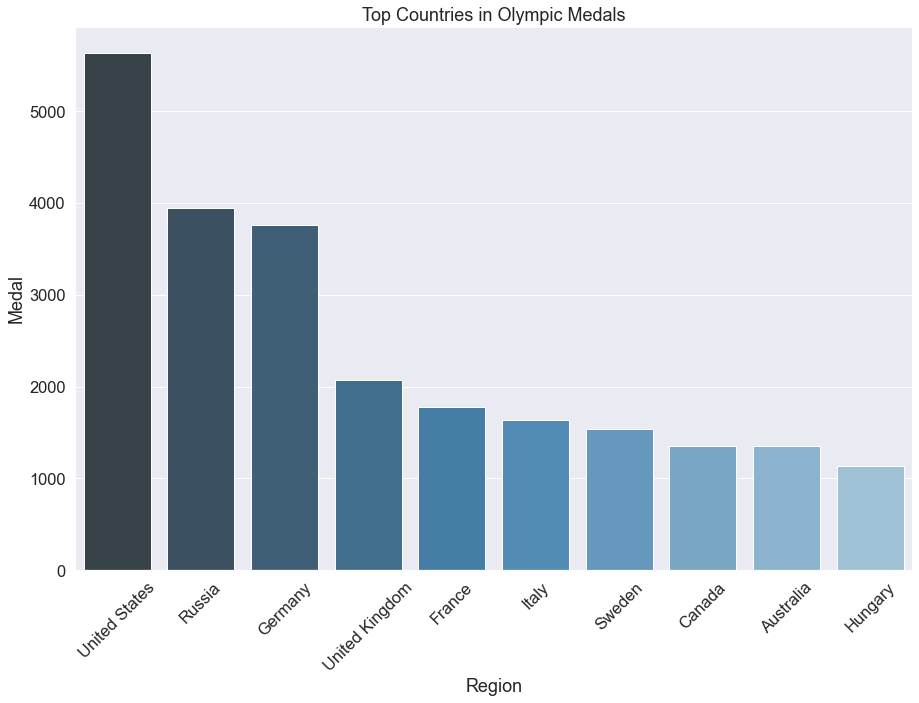

In [15]:
plt.figure(figsize=(15, 10))
top_countries=olympics_df.groupby('region')['Medal'].count().nlargest(10).reset_index()

sns.set(font_scale=1.5)
pal = sns.color_palette("Blues_d", len(top_countries))
sns.barplot('region','Medal',data=top_countries, palette=np.array(pal[::-1]))

plt.xlabel('Region')
plt.xticks(rotation=45)
plt.title('Top Countries in Olympic Medals')
plt.show()

In [16]:
# new_df_1=pd.DataFrame()
# x=0
# for i in final_df_summer['Host_Country'].unique():
#     y=final_df_summer[final_df_summer['region'] == i].groupby('Year').count()['Medal']
#     new_df_1.insert(x,i,value=y)
#     x+=1
# new_df_1
# new_df_1.groupby('Year').plot(kind='bar',figsize=(10,6))

# plt.show()

In [17]:
!pip install plotly
import plotly.express as px

     |████████████████████████████████| 15.2 MB 1.8 MB/s eta 0:00:01


In [18]:
olympics_df['Is Host'] = (olympics_df['region'] == olympics_df['Host_Country'])
final_df_summer = olympics_df[olympics_df['Season']== 'Summer']
final_df_summer.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal,Is Host
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,NaN,False
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,NaN,False
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,NaN,False
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold,False
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,Netherlands,1932,Summer,1932 Summer,Los Angeles,United States,Athletics,NaN,False


In [78]:
us_df = final_df_summer[final_df_summer['NOC'] == 'USA']
final_us = us_df.groupby(['Year', 'Is Host']).count()['Medal'].reset_index()
final_us
color_discrete_map={
                 True: 'red',
                 False: 'grey'
                 }
fig = px.bar(final_us,x='Year',y='Medal', color='Is Host',
             color_discrete_map=color_discrete_map,
             labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(title='Total number of medals won by USA during each year')
fig.show()

In [79]:
fra_df = final_df_summer[final_df_summer['NOC'] == 'FRA']
final_fra = fra_df.groupby(['Year', 'Is Host']).count()['Medal'].reset_index()
color_discrete_map={
                 True: 'red',
                 False: 'grey'
                 }
fig = px.bar(final_fra,x='Year',y='Medal', color='Is Host',
             color_discrete_map=color_discrete_map,
             labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(title='Total number of medals won by France during each year')
fig.show()

In [21]:
uk_df = final_df_summer[final_df_summer['NOC'] == 'GBR']
final_uk = uk_df.groupby(['Year', 'Is Host']).count()['Medal'].reset_index()
color_discrete_map={
                 True: 'red',
                 False: 'grey'
                 }
fig = px.bar(final_uk,x='Year',y='Medal', color='Is Host',
             color_discrete_map=color_discrete_map,
             labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(title='Total number of medals won by United Kingdom during each year')
fig.show()

In [22]:
esp_df = final_df_summer[final_df_summer['NOC'] == 'ESP']
final_esp = esp_df.groupby(['Year', 'Is Host']).count()['Medal'].reset_index()
color_discrete_map={
                 True: 'red',
                 False: 'grey'
                 }
fig = px.bar(final_esp,x='Year',y='Medal', color='Is Host',
             color_discrete_map=color_discrete_map,
             labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(title='Total number of medals won by Spain during each year')
fig.show()

In [23]:
aus_df = final_df_summer[final_df_summer['NOC'] == 'AUS']
final_aus = aus_df.groupby(['Year', 'Is Host']).count()['Medal'].reset_index()
color_discrete_map={
                 True: 'red',
                 False: 'grey'
                 }
fig = px.bar(final_aus,x='Year',y='Medal', color='Is Host',
             color_discrete_map=color_discrete_map,
             labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(title='Total number of medals won by Australia during each year')
fig.show()

In [24]:
chn_df = final_df_summer[final_df_summer['NOC'] == 'CHN']
final_chn = chn_df.groupby(['Year', 'Is Host']).count()['Medal'].reset_index()
color_discrete_map={
                 True: 'red',
                 False: 'grey'
                 }
fig = px.bar(final_chn,x='Year',y='Medal', color='Is Host',
             color_discrete_map=color_discrete_map,
             labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(title='Total number of medals won by China during each year')
fig.show()

In [81]:
final_df_summer['Medal'].fillna('DNW', inplace = True)
final_df_summer['Medal_Won'] = np.where(final_df_summer.loc[:,'Medal'] == 'DNW', 0, 1)
final_df_summer.head(10)

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal,Is Host,Medal_Won
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,DNW,False,0
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,DNW,False,0
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,DNW,False,0
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold,False,1
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,Netherlands,1932,Summer,1932 Summer,Los Angeles,United States,Athletics,DNW,False,0
27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,Netherlands,1932,Summer,1932 Summer,Los Angeles,United States,Athletics,DNW,False,0
29,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,FIN,Finland,1952,Summer,1952 Summer,Helsinki,Finland,Swimming,DNW,True,0
31,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,Finland,2000,Summer,2000 Summer,Sydney,Australia,Badminton,DNW,False,0
32,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,Finland,1996,Summer,1996 Summer,Atlanta,United States,Sailing,DNW,False,0
33,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,Finland,2000,Summer,2000 Summer,Sydney,Australia,Sailing,DNW,False,0


In [82]:
medal_tally = final_df_summer.groupby(['Year', 'region', 'Medal'])[['Medal_Won']].agg('sum').reset_index()
medal_tally = medal_tally.groupby(['Year','region'])['Medal_Won'].agg('sum').reset_index()

medal_tally['Medal_Won'] = medal_tally['Medal_Won'].astype(float)
medal_tally

,Year,region,Medal_Won
0,1896,Australia,3.0
1,1896,Austria,5.0
2,1896,Denmark,6.0
3,1896,France,11.0
4,1896,Germany,32.0
5,1896,Greece,48.0
6,1896,Hungary,6.0
7,1896,Italy,0.0
8,1896,Sweden,0.0
9,1896,Switzerland,3.0


In [83]:
year_host_region = final_df_summer[['Year', 'Host_Country', 'region']].drop_duplicates()

host_rule = (year_host_region['Host_Country'] == year_host_region['region'])

year_host_region['Prev_Year'] = year_host_region['Year'] - 4
year_host_region['Next_Year'] = year_host_region['Year'] + 4

year_host_region = year_host_region[(year_host_region['Host_Country'] == year_host_region['region'])]

# Calculate the medals won in each year where a team played at home. 
year_host_region_medal = year_host_region.merge(medal_tally,
                                           left_on = ['Year', 'region'],
                                           right_on = ['Year', 'region'],
                                           how = 'left')

year_host_region_medal.rename(columns = {'Medal_Won' : 'Medal_Won_Host_Year'}, inplace = True)

# Calculate the medals won by the team in the previous game.
year_host_region_medal = year_host_region_medal.merge(medal_tally,
                                                 left_on = ['Prev_Year', 'region'],
                                                 right_on = ['Year', 'region'],
                                                 how = 'left')

year_host_region_medal.drop('Year_y', axis = 1, inplace = True)
year_host_region_medal.rename(columns = {'Medal_Won': 'Medal_Won_Prev_Year',
                                      'Year_x':'Year'}, inplace = True)

# Calculate the medals won by the team in the next game.
year_host_region_medal = year_host_region_medal.merge(medal_tally,
                                                 left_on = ['Next_Year', 'region'],
                                                 right_on = ['Year', 'region'],
                                                 how = 'left')

year_host_region_medal.drop('Year_y', axis = 1, inplace = True)
year_host_region_medal.rename(columns = {'Year_x': 'Year',
                                      'Medal_Won' : 'Medal_Won_Next_Year'}, inplace = True)

# Change format
year_host_region_medal.drop(['region', 'Prev_Year', 'Next_Year'], axis = 1, inplace = True)
year_host_region_medal.sort_values('Year', ascending = True, inplace = True)
year_host_region_medal.reset_index(inplace = True, drop = True)

# Re-ordering
year_host_region_medal = year_host_region_medal.loc[:, ['Year', 'Host_Country', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

# Replace NaN with 0
year_host_region_medal['Medal_Won_Prev_Year'] = year_host_region_medal['Medal_Won_Prev_Year'].replace(np.nan, 0)
year_host_region_medal['Medal_Won_Next_Year'] = year_host_region_medal['Medal_Won_Next_Year'].replace(np.nan, 0)

# Determine host country effect
year_host_region_medal['Host_Country_Effect']=(year_host_region_medal['Medal_Won_Host_Year']>year_host_region_medal['Medal_Won_Prev_Year']) & (year_host_region_medal['Medal_Won_Host_Year']>year_host_region_medal['Medal_Won_Next_Year'])

# Get recent data
year_host_region_medal = year_host_region_medal.loc[year_host_region_medal['Year'] >= 1960]
year_host_region_medal


,Year,Host_Country,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year,Host_Country_Effect
15,1960,Italy,47.0,88.0,51.0,True
16,1964,Japan,31.0,62.0,63.0,False
17,1968,Mexico,1.0,9.0,1.0,True
18,1972,Germany,103.0,253.0,273.0,False
19,1976,Canada,11.0,23.0,0.0,True
20,1980,Russia,286.0,442.0,0.0,True
21,1984,United States,0.0,352.0,207.0,True
22,1988,South Korea,41.0,77.0,49.0,True
23,1992,Spain,5.0,69.0,66.0,True
24,1996,United States,224.0,259.0,242.0,True


Text(0, 0.5, '')

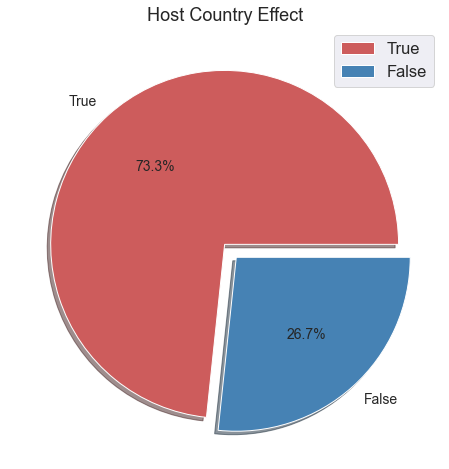

In [28]:
year_host_region_medal['Host_Country_Effect'].value_counts().plot(kind='pie',autopct='%1.1f%%', 
                                                                explode=(0, 0.1),shadow=True, 
                                                                startangle=0,colors = ['indianred','steelblue'],
                                                                figsize=(8,8),title='Host Country Effect',
                                                                fontsize = 14)
plt.legend()
plt.ylabel("")

Part 2: Gender - Sabrina

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)

In [30]:
# First, look into the data of Male
pd.set_option("display.max_rows", None)
male_df = olympics_df[olympics_df.Sex == 'M'].groupby(['Medal']).region.value_counts()

In [31]:
male_df_1 = male_df.to_frame()
male_df_2 = male_df_1.rename(columns={"region": "medal_count"})
male_df_3 = male_df_2.reset_index(drop = False)
display (male_df_3[:10])
display (male_df_3[107:117])
display (male_df_3[198:208])

,Medal,region,medal_count
0,Bronze,United States,939
1,Bronze,Germany,859
2,Bronze,Russia,781
3,Bronze,France,580
4,Bronze,United Kingdom,486
5,Bronze,Italy,452
6,Bronze,Sweden,451
7,Bronze,Finland,359
8,Bronze,Australia,332
9,Bronze,Netherlands,271


,Medal,region,medal_count
107,Gold,United States,1786
108,Gold,Russia,1035
109,Gold,Germany,864
110,Gold,United Kingdom,579
111,Gold,Italy,514
112,Gold,France,446
113,Gold,Sweden,434
114,Gold,Hungary,363
115,Gold,Canada,305
116,Gold,Norway,301


,Medal,region,medal_count
198,Silver,United States,1107
199,Silver,Germany,787
200,Silver,Russia,774
201,Silver,United Kingdom,608
202,Silver,France,523
203,Silver,Italy,452
204,Silver,Sweden,431
205,Silver,Norway,290
206,Silver,Canada,285
207,Silver,Australia,280


In [32]:
# Separate data into Male and by Medal
olympics_df_male_G = olympics_df[(olympics_df.Sex == 'M') & (olympics_df.Medal == 'Gold')]
olympics_df_male_S = olympics_df[(olympics_df.Sex == 'M') & (olympics_df.Medal == 'Silver')]
olympics_df_male_B = olympics_df[(olympics_df.Sex == 'M') & (olympics_df.Medal == 'Bronze')]

Text(0, 0.5, 'Medal Count')

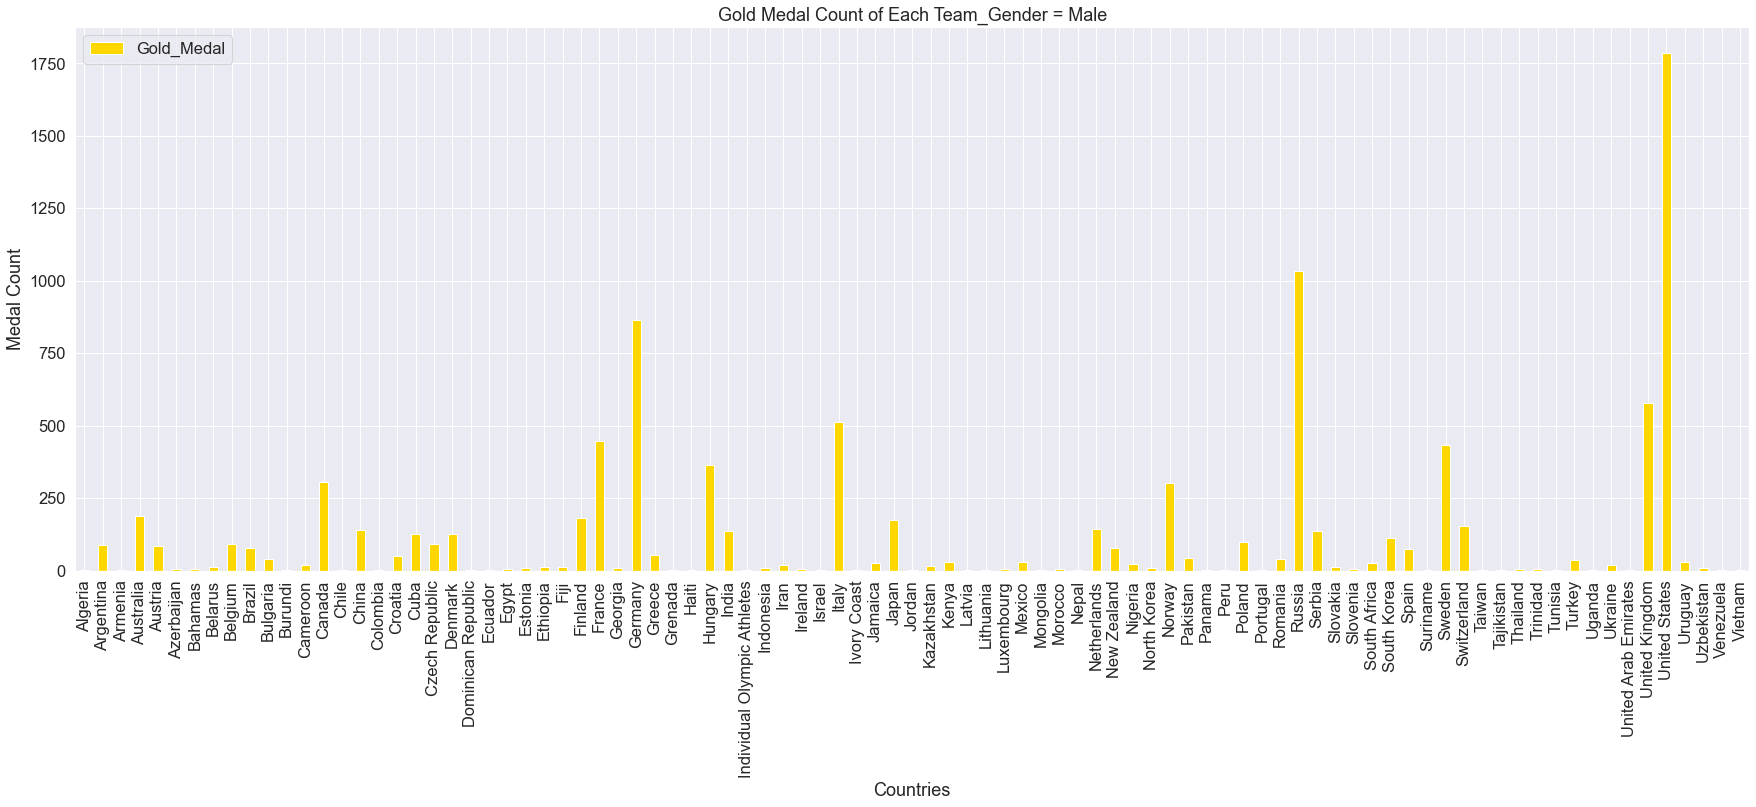

In [33]:
df = olympics_df_male_G.groupby(['region']).Medal.value_counts()
df_1 = df.to_frame()
df_2 = df_1.rename(columns={"Medal": "Gold_Medal"})
df_3 = df_2.reset_index(drop = False)
y = df_3.drop(columns = 'Medal')
plt.rcParams["figure.figsize"] = [30, 10]
y.plot.bar(x='region', y='Gold_Medal', color = 'Gold')
plt.title("Gold Medal Count of Each Team_Gender = Male")
plt.xlabel("Countries")
plt.ylabel("Medal Count")

Text(0, 0.5, 'Medal Count')

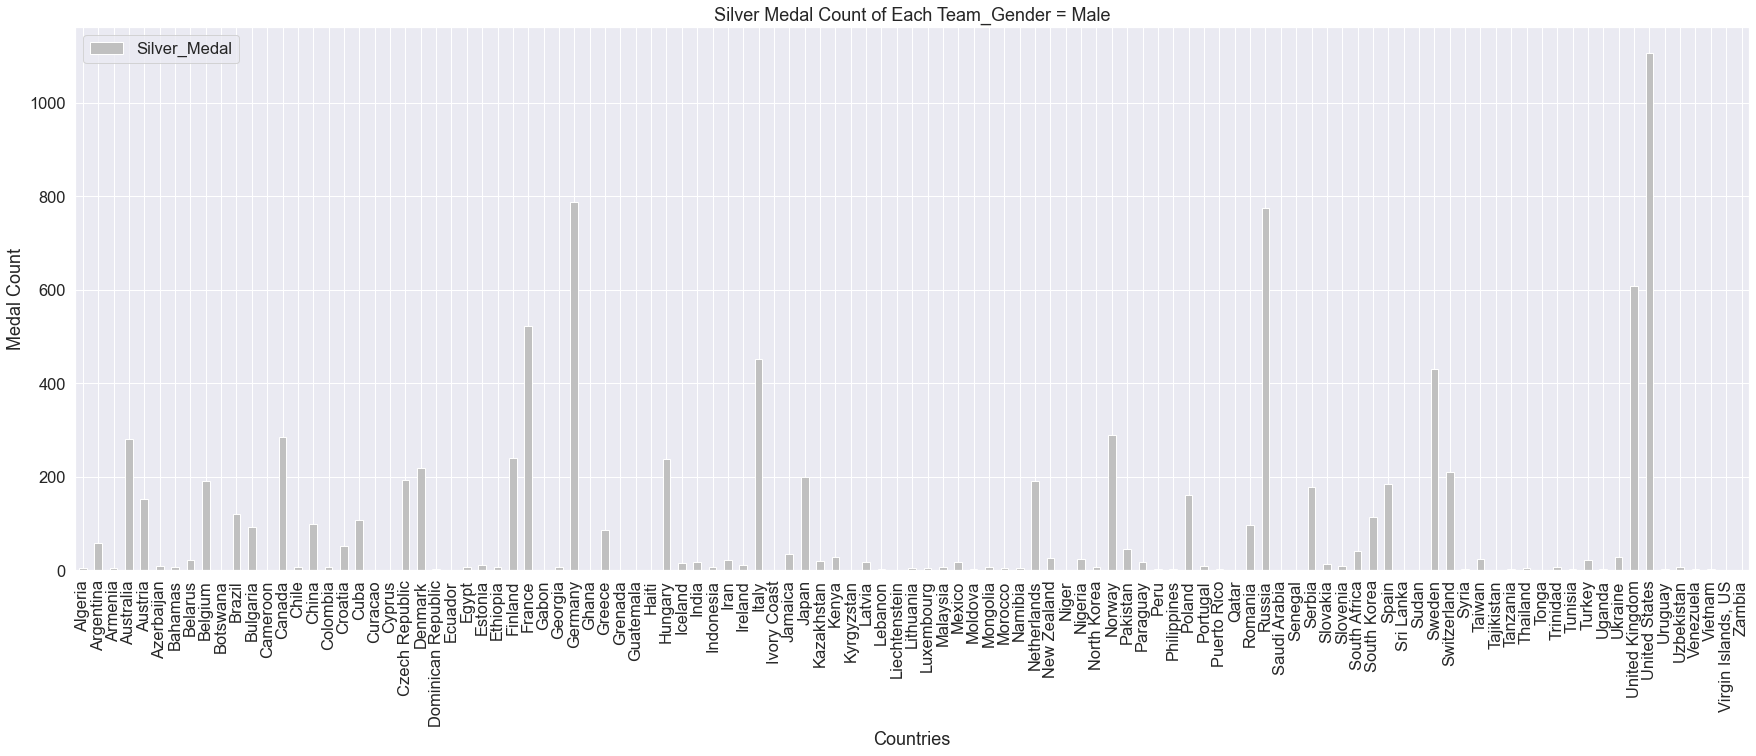

In [34]:
df = olympics_df_male_S.groupby(['region']).Medal.value_counts()
df_1 = df.to_frame()
df_2 = df_1.rename(columns={"Medal": "Silver_Medal"})
df_3 = df_2.reset_index(drop = False)
y = df_3.drop(columns = 'Medal')
plt.rcParams["figure.figsize"] = [30, 10]
y.plot.bar(x='region', y='Silver_Medal', color = 'Silver')
plt.title("Silver Medal Count of Each Team_Gender = Male")
plt.xlabel("Countries")
plt.ylabel("Medal Count")

Text(0, 0.5, 'Medal Count')

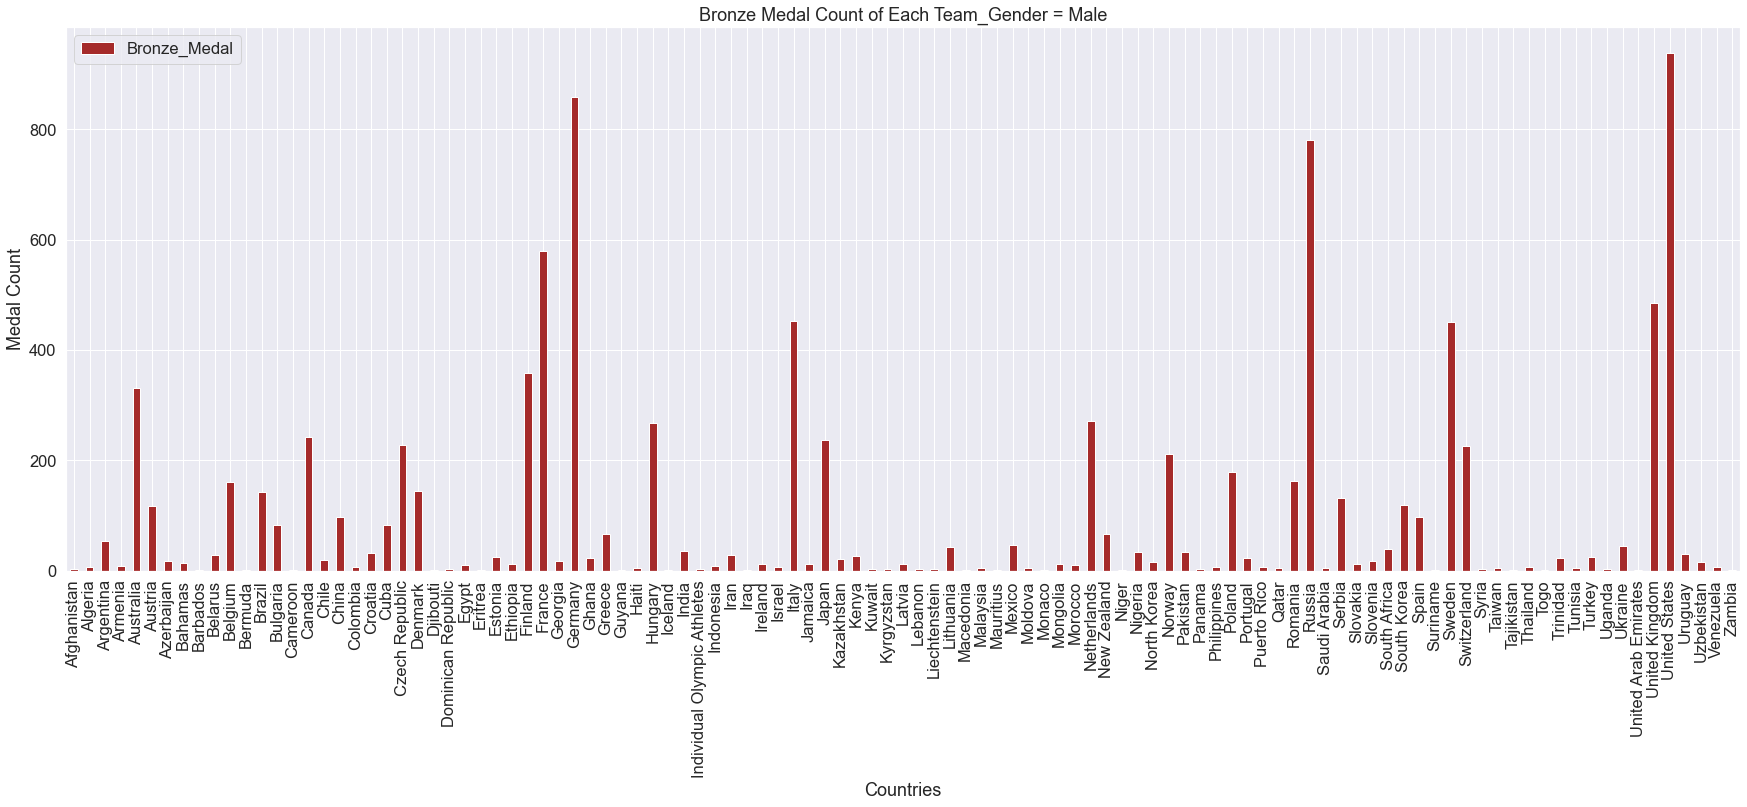

In [35]:
df = olympics_df_male_B.groupby(['region']).Medal.value_counts()
df_1 = df.to_frame()
df_2 = df_1.rename(columns={"Medal": "Bronze_Medal"})
df_3 = df_2.reset_index(drop = False)
y = df_3.drop(columns = 'Medal')
plt.rcParams["figure.figsize"] = [30, 10]
y.plot.bar(x='region', y='Bronze_Medal', color = 'brown')
plt.title("Bronze Medal Count of Each Team_Gender = Male")
plt.xlabel("Countries")
plt.ylabel("Medal Count")

### After interpreting the chart and the numbers, we can found that United States, Soviet Union, Italy, Germany have the leading place in all three types of medals.

### Then look into female, which country tend to perform better?

In [36]:
#Numbers
#Then look into the data of Male
pd.set_option("display.max_rows", None)
female_df = olympics_df[olympics_df.Sex == 'F'].groupby(['Medal']).region.value_counts()

In [37]:
female_df_1 = female_df.to_frame()
female_df_2 = female_df_1.rename(columns={"region": "medal_count"})
female_df_3 = female_df_2.reset_index(drop = False)
display (female_df_3[:10])
display (female_df_3[78:88])
display (female_df_3[145:155])

,Medal,region,medal_count
0,Bronze,United States,419
1,Bronze,Germany,401
2,Bronze,Russia,397
3,Bronze,Canada,209
4,Bronze,China,196
5,Bronze,Australia,190
6,Bronze,United Kingdom,165
7,Bronze,Netherlands,142
8,Bronze,Romania,130
9,Bronze,Japan,120


,Medal,region,medal_count
78,Gold,United States,852
79,Gold,Russia,564
80,Gold,Germany,437
81,Gold,China,211
82,Gold,Australia,180
83,Gold,Canada,158
84,Gold,Netherlands,142
85,Gold,Romania,121
86,Gold,South Korea,110
87,Gold,United Kingdom,99


,Medal,region,medal_count
145,Silver,United States,534
146,Silver,Germany,408
147,Silver,Russia,396
148,Silver,China,249
149,Silver,Australia,179
150,Silver,Canada,153
151,Silver,Netherlands,148
152,Silver,United Kingdom,131
153,Silver,South Korea,118
154,Silver,Japan,109


In [38]:
# Sepereate data into Female and by Medal
olympics_df_female_G = olympics_df[(olympics_df.Sex == 'F') & (olympics_df.Medal == 'Gold')]
olympics_df_female_S = olympics_df[(olympics_df.Sex == 'F') & (olympics_df.Medal == 'Silver')]
olympics_df_female_B = olympics_df[(olympics_df.Sex == 'F') & (olympics_df.Medal == 'Bronze')]

#### Gold Medal

Text(0, 0.5, 'Medal Count')

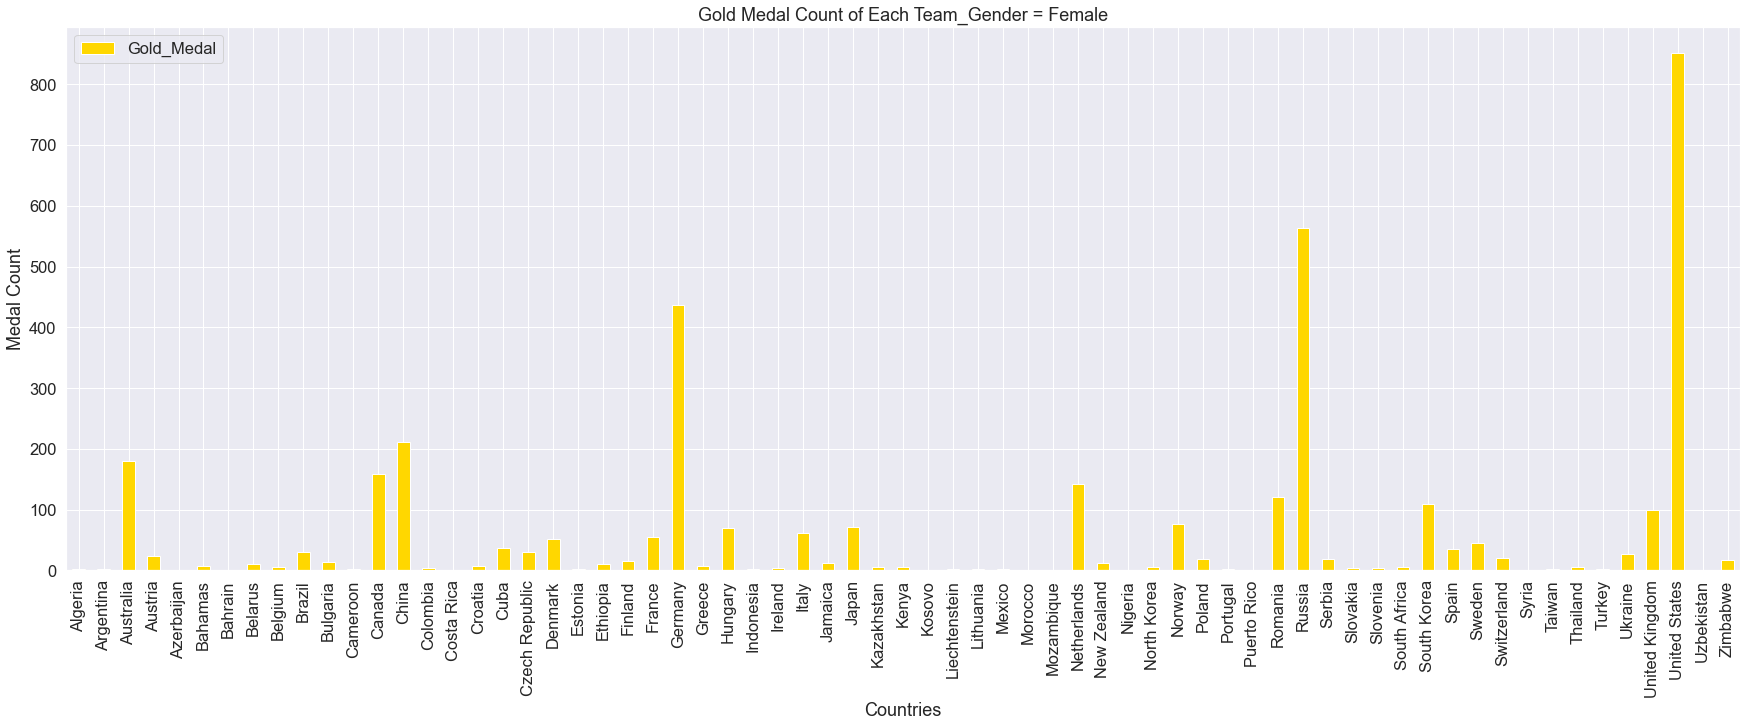

In [39]:
df = olympics_df_female_G.groupby(['region']).Medal.value_counts()
df_1 = df.to_frame()
df_2 = df_1.rename(columns={"Medal": "Gold_Medal"})
df_3 = df_2.reset_index(drop = False)
y = df_3.drop(columns = 'Medal')
plt.rcParams["figure.figsize"] = [30, 10]
y.plot.bar(x='region', y='Gold_Medal', color = 'Gold')
plt.title("Gold Medal Count of Each Team_Gender = Female")
plt.xlabel("Countries")
plt.ylabel("Medal Count")

#### Silver Medal

Text(0, 0.5, 'Medal Count')

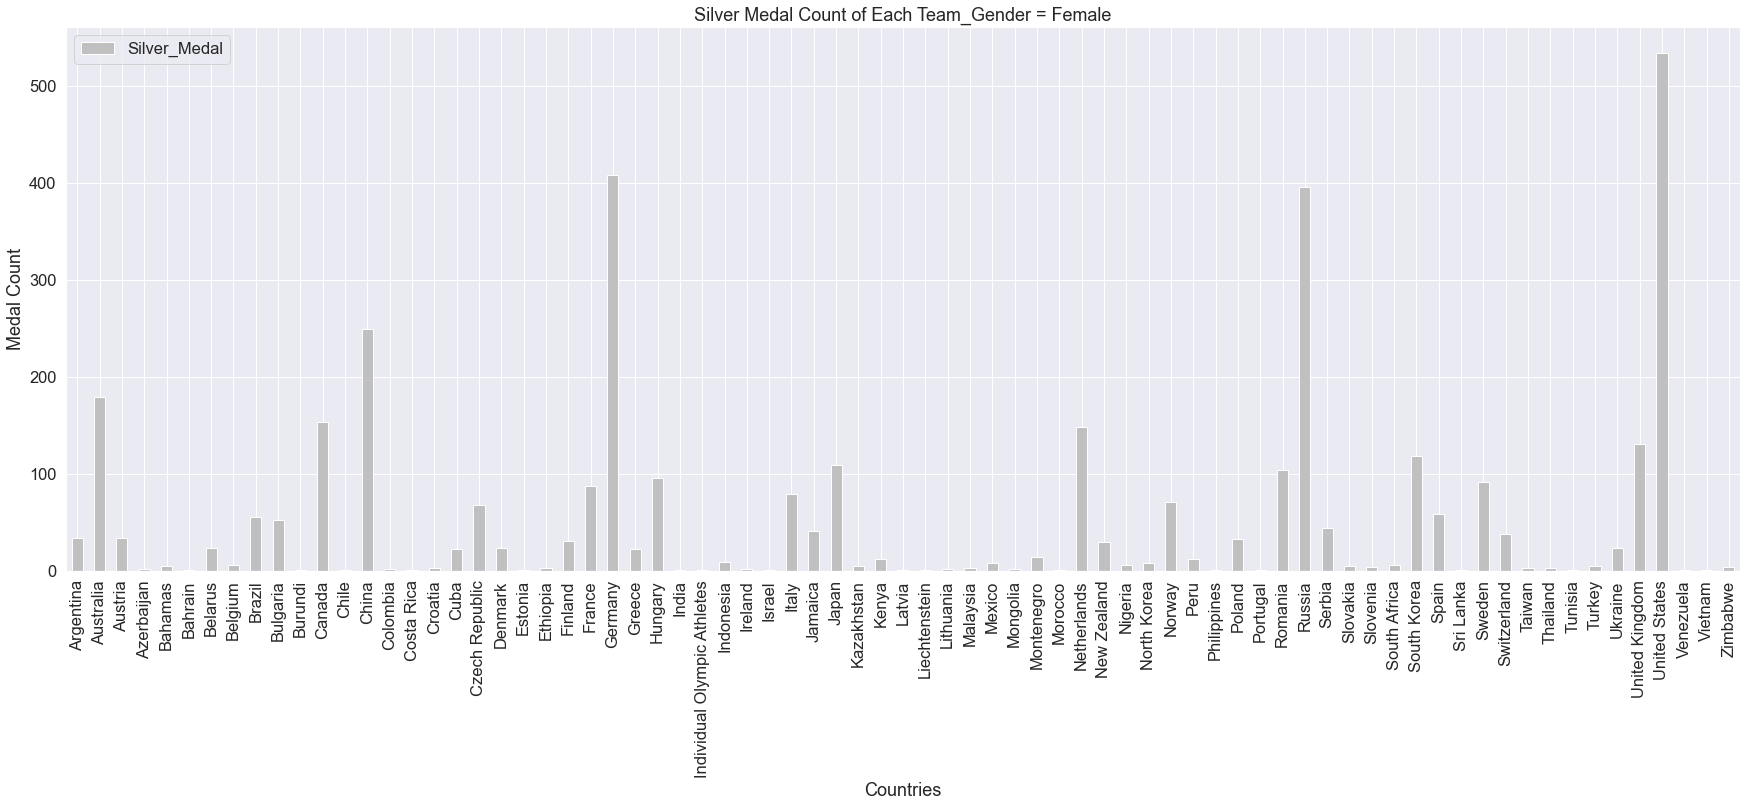

In [40]:
df = olympics_df_female_S.groupby(['region']).Medal.value_counts()
df_1 = df.to_frame()
df_2 = df_1.rename(columns={"Medal": "Silver_Medal"})
df_3 = df_2.reset_index(drop = False)
y = df_3.drop(columns = 'Medal')
plt.rcParams["figure.figsize"] = [30, 10]
y.plot.bar(x='region', y='Silver_Medal', color = 'Silver')
plt.title("Silver Medal Count of Each Team_Gender = Female")
plt.xlabel("Countries")
plt.ylabel("Medal Count")

#### Bronze Medal

Text(0, 0.5, 'Medal Count')

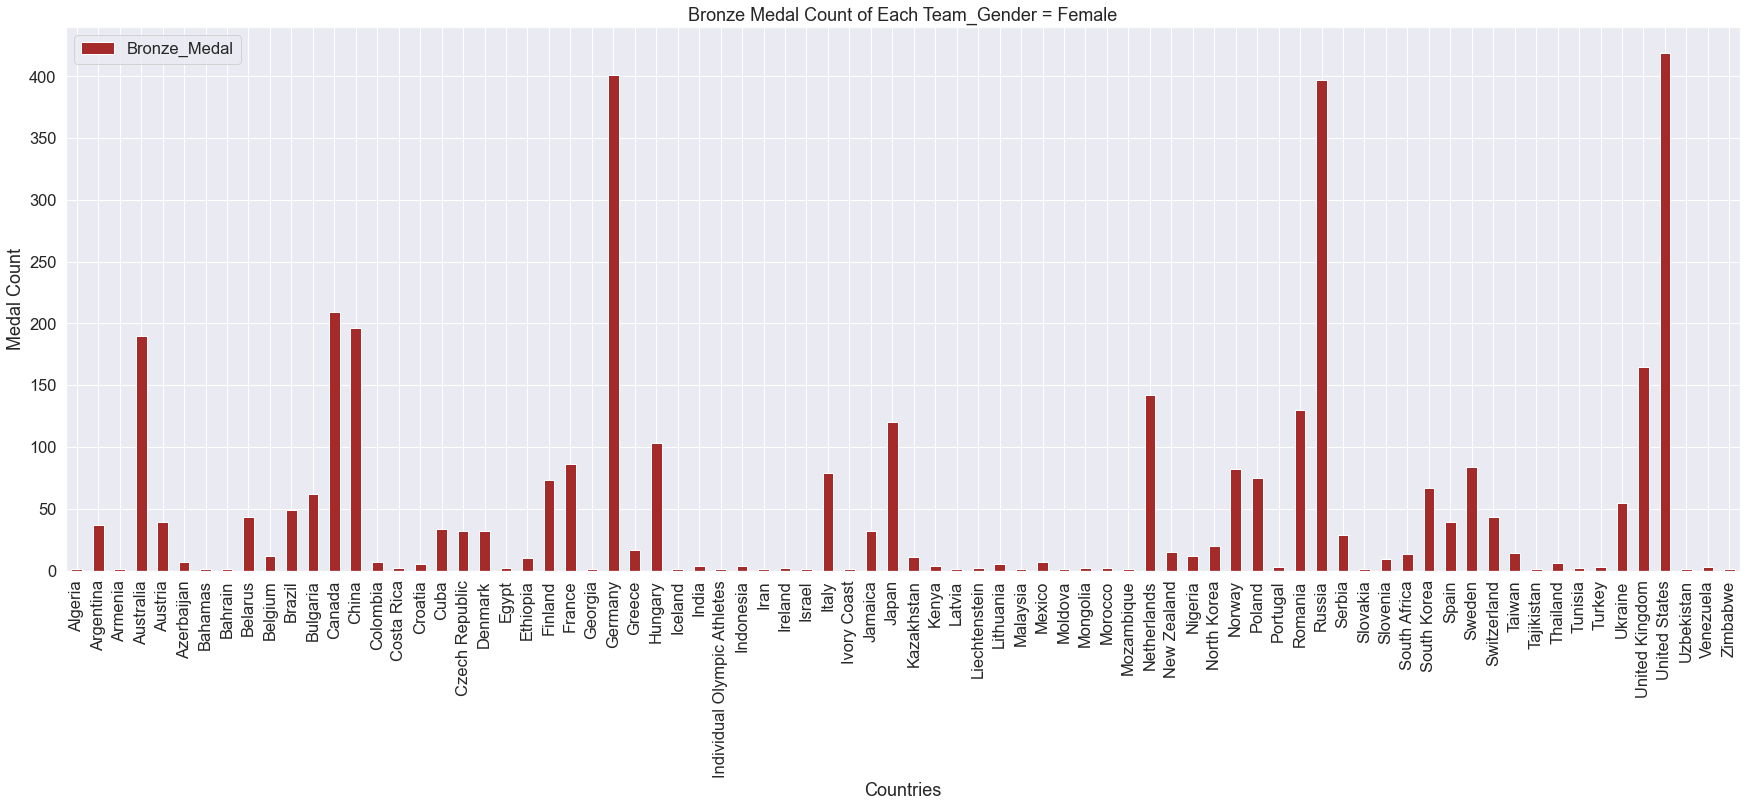

In [41]:
df = olympics_df_female_B.groupby(['region']).Medal.value_counts()
df_1 = df.to_frame()
df_2 = df_1.rename(columns={"Medal": "Bronze_Medal"})
df_3 = df_2.reset_index(drop = False)
y = df_3.drop(columns = 'Medal')
plt.rcParams["figure.figsize"] = [30, 10]
y.plot.bar(x='region', y='Bronze_Medal', color = 'brown')
plt.title("Bronze Medal Count of Each Team_Gender = Female")
plt.xlabel("Countries")
plt.ylabel("Medal Count")

### Now look into the numbers and chart of female, United States, Russia, China and Germany are in the leading spots of these three types of medals.

Part 3: Age - Michelle

In [42]:
olympics_df.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal,Is Host
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,NaN,False
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,NaN,False
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,NaN,False
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold,False
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,1988,Winter,1988 Winter,Calgary,Canada,Speed Skating,NaN,False


In [43]:
olympic_medalists = olympics_df.dropna()

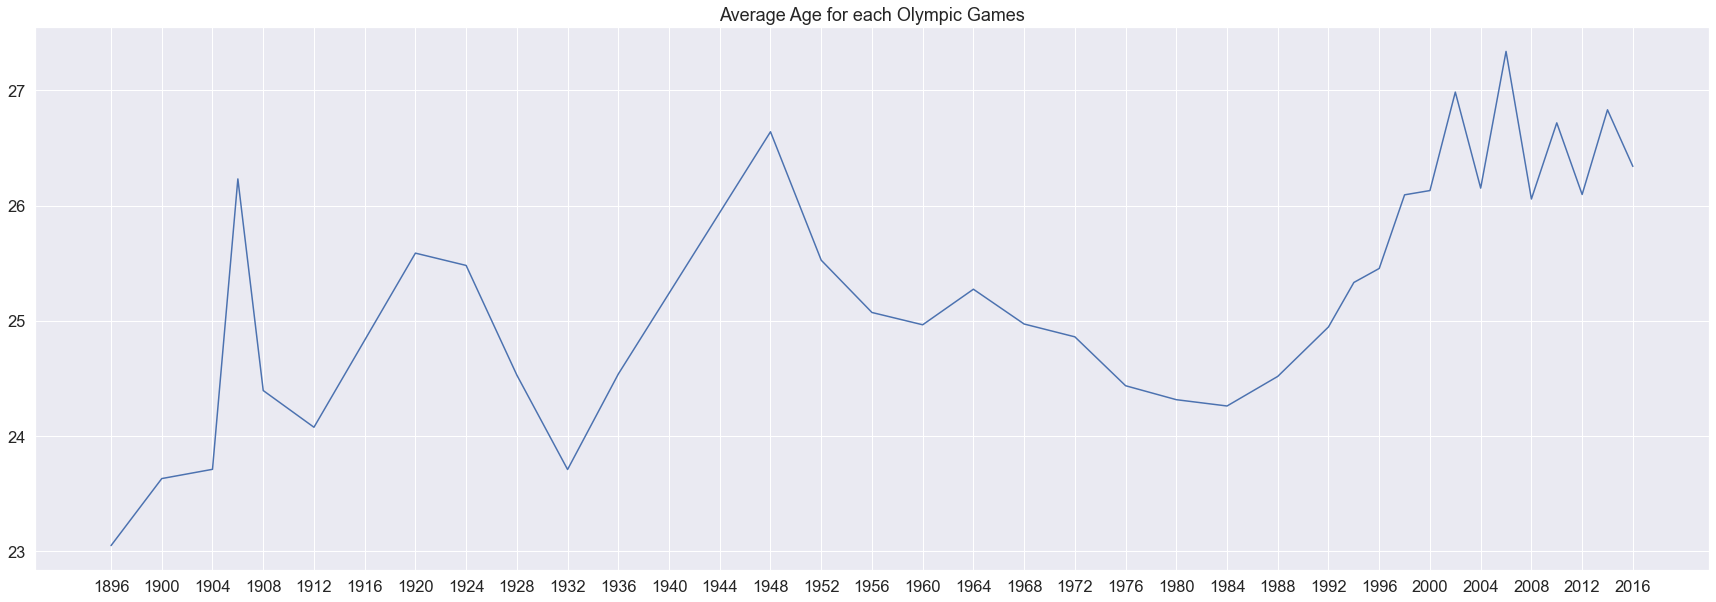

In [44]:
age_df = olympic_medalists.groupby(['Year'],as_index=False).mean()
age_df = age_df[np.isfinite(age_df['Age'])]
age_df = age_df.groupby('Year',as_index= False).mean()
plt.figure(figsize=(30, 10))
plt.plot(age_df.Year,age_df.Age)
plt.xticks(range(1896,2020,4))
plt.title('Average Age for each Olympic Games')
plt.show()

In [45]:
goldMedals = olympic_medalists[(olympic_medalists.Medal == 'Gold')]
goldMedals.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal,Is Host
42,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,Finland,1948,Summer,1948 Summer,London,United Kingdom,Gymnastics,Gold,False
44,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,Finland,1948,Summer,1948 Summer,London,United Kingdom,Gymnastics,Gold,False
48,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,Finland,1948,Summer,1948 Summer,London,United Kingdom,Gymnastics,Gold,False
60,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,Norway,1992,Winter,1992 Winter,Albertville,France,Alpine Skiing,Gold,False
73,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,Norway,2002,Winter,2002 Winter,Salt Lake City,United States,Alpine Skiing,Gold,False


In [46]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [47]:
goldMedals.Age = goldMedals.Age.astype(int)

/Users/sabrina8654/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of Gold Medals')

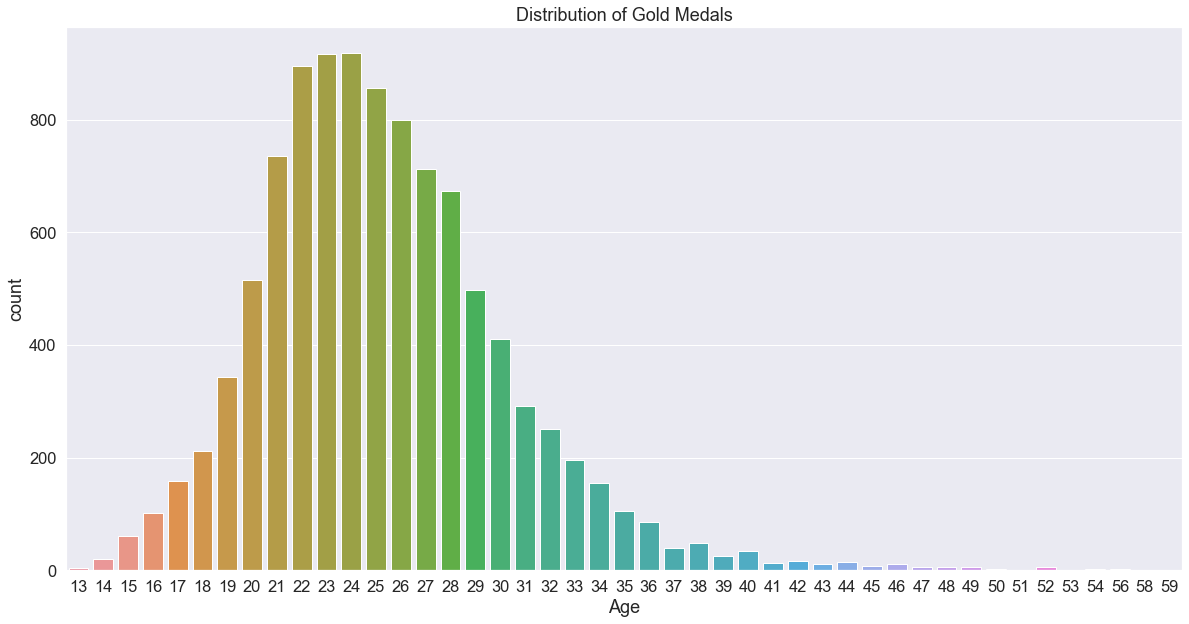

In [48]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
import seaborn as sns
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

/Users/sabrina8654/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gold Medals for Athletes less 20')

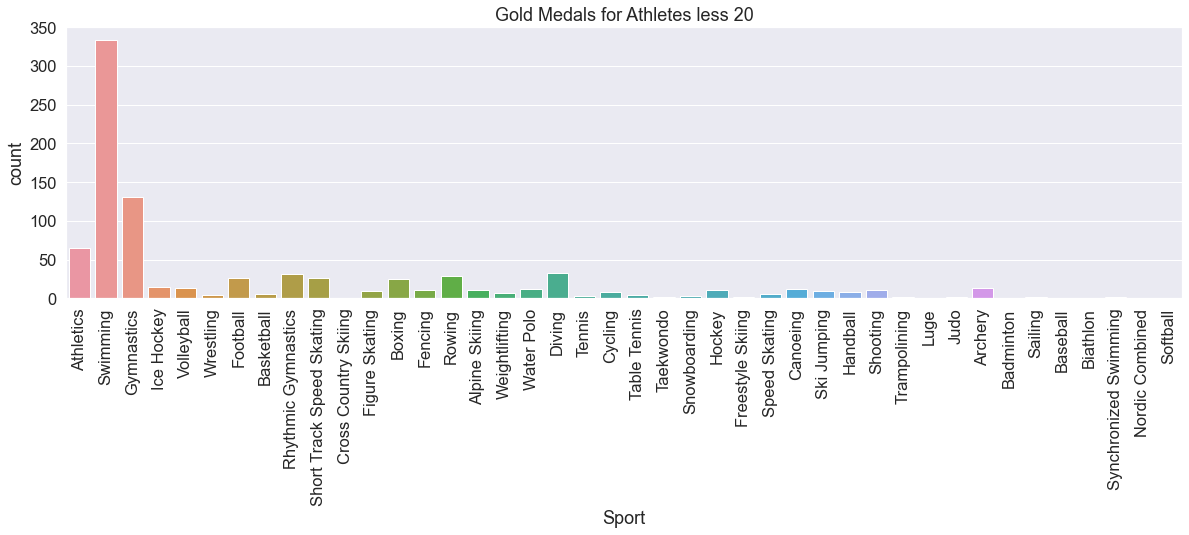

In [49]:
young_gold = goldMedals['Sport'][goldMedals['Age'] <20]
plt.figure(figsize=(20, 5))
plt.tight_layout()
sns.countplot(young_gold)
plt.xticks(rotation=90)
plt.title('Gold Medals for Athletes less 20')

/Users/sabrina8654/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gold Medals for Athletes more than 50')

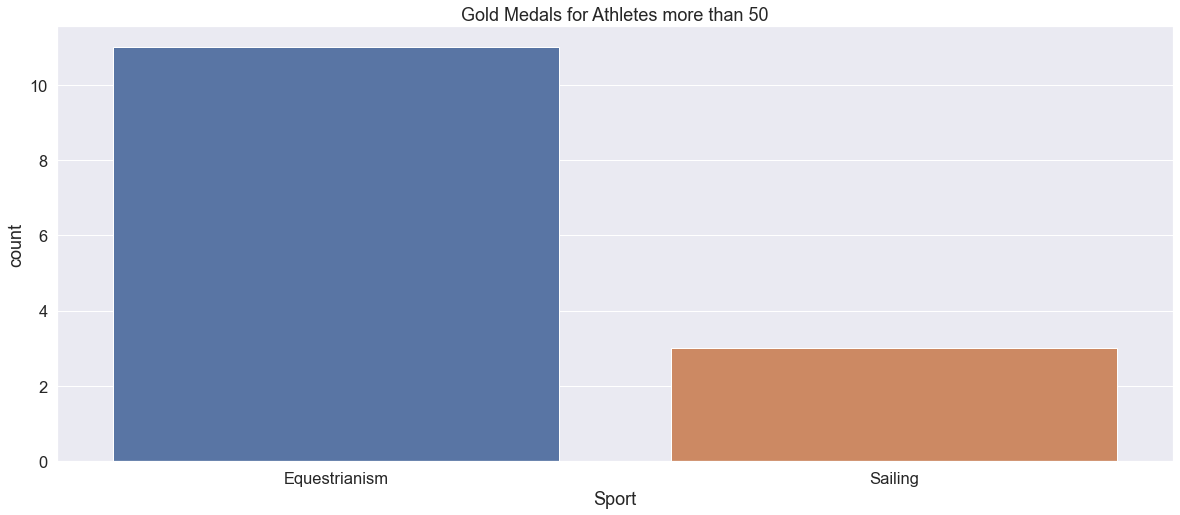

In [50]:
old_gold = goldMedals['Sport'][goldMedals['Age'] >50]
plt.figure(figsize=(20, 8))
plt.tight_layout()
sns.countplot(old_gold)
plt.title('Gold Medals for Athletes more than 50')

Text(0.5, 1.0, 'Variation of Gymnastics Athletes over age')

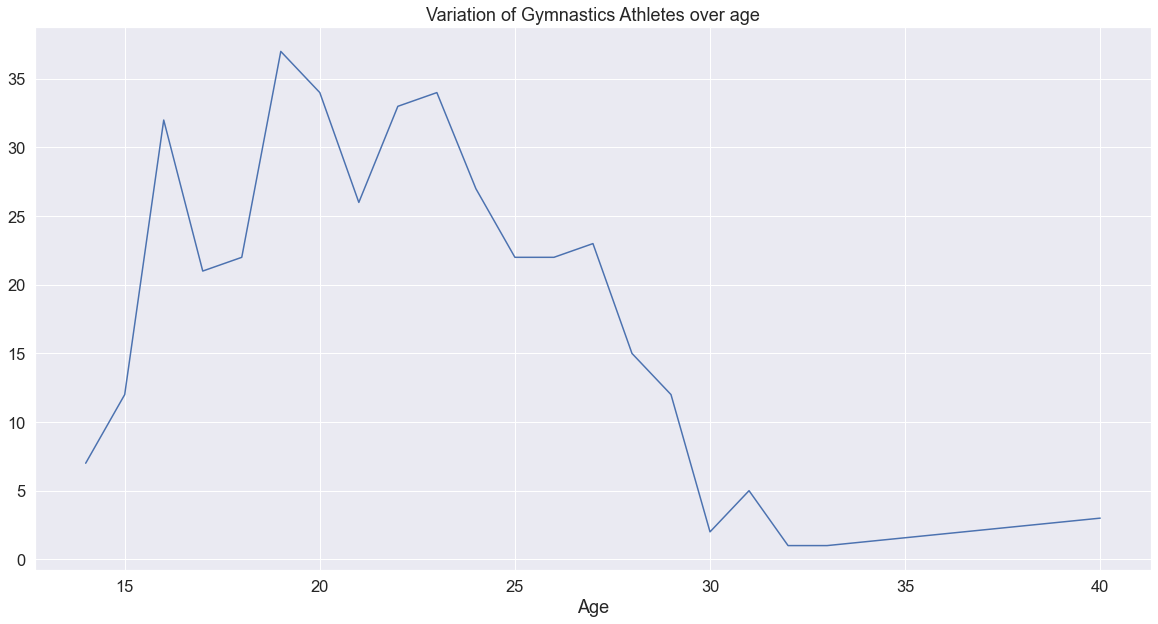

In [51]:
Gymnastics_age = goldMedals.groupby('Age')['Sport'].value_counts()
plt.figure(figsize=(20, 10))
Gymnastics_age.loc[:,'Gymnastics'].plot()
plt.title('Variation of Gymnastics Athletes over age')

Text(0.5, 1.0, 'Variation of Badminton Athletes over age')

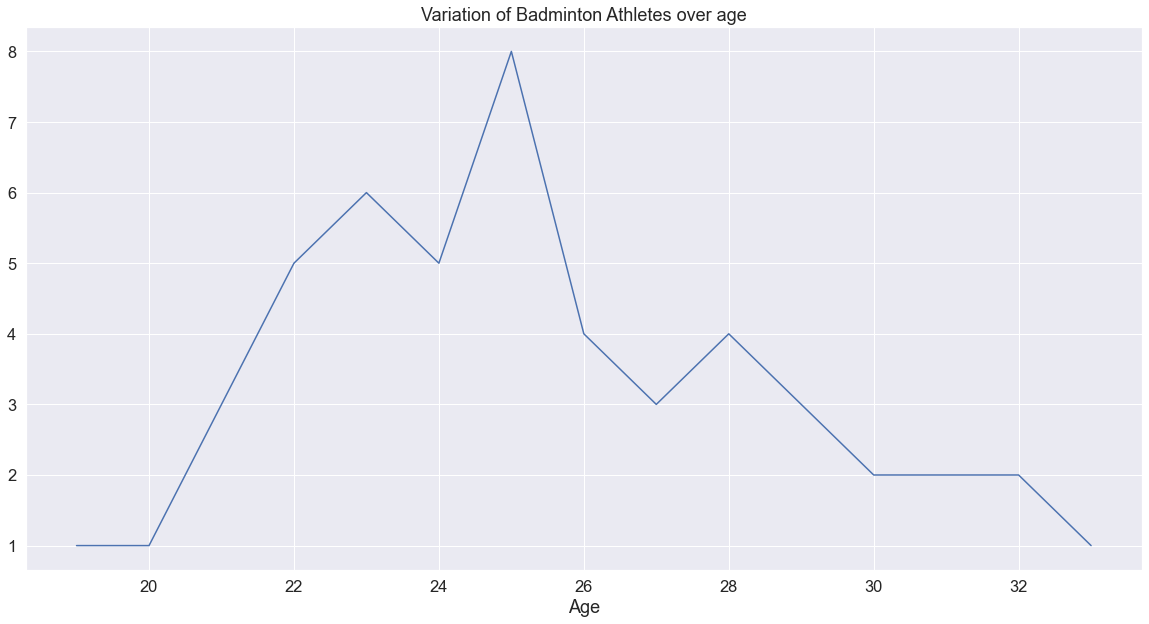

In [52]:
badminton_age = goldMedals.groupby('Age')['Sport'].value_counts()
plt.figure(figsize=(20, 10))
badminton_age.loc[:,'Badminton'].plot()
plt.title('Variation of Badminton Athletes over age')

/Users/sabrina8654/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Variation of Age for Basketball Athletes over time')

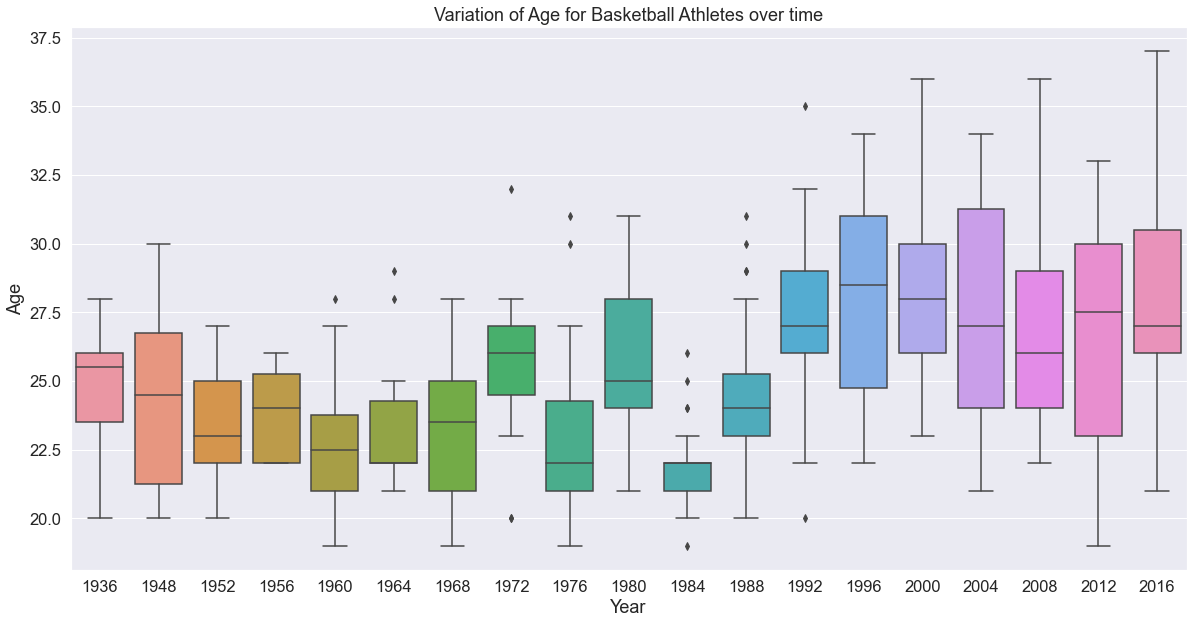

In [53]:
Basketball_Year = goldMedals[goldMedals.Sport == 'Basketball']
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=Basketball_Year)
plt.title('Variation of Age for Basketball Athletes over time')

Part 4: Sports - George

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab as plt
import plotly.express as px

In [55]:
# olympics_df = pd.read_csv('athlete_events.csv')

In [56]:
#noc_df = pd.read_csv('/content/drive/MyDrive/noc_regions.csv')

In [57]:
#To see how many Sports in Olympics
print(' Total of',olympics_df['Sport'].nunique(),'Sports in Olympics.\n \n Following is the list:\n \n', olympics_df['Sport'].unique())

 Total of 66 Sports in Olympics.
 
 Following is the list:
 
 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [58]:
olympics_df.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal,Is Host
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,NaN,False
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,NaN,False
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,NaN,False
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold,False
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,1988,Winter,1988 Winter,Calgary,Canada,Speed Skating,NaN,False


In [59]:
#To see how many Sports in Olympics
print(' Total of',olympics_df['Sport'].nunique(),'Sports in Olympics.\n \n Following is the list:\n \n', olympics_df['Sport'].unique())

 Total of 66 Sports in Olympics.
 
 Following is the list:
 
 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [60]:
# Which Top 10 Sports are most popular 
Top_10_Sport=olympics_df.Sport.value_counts()
Top_10_Sport.head(10) 

Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: Sport, dtype: int64

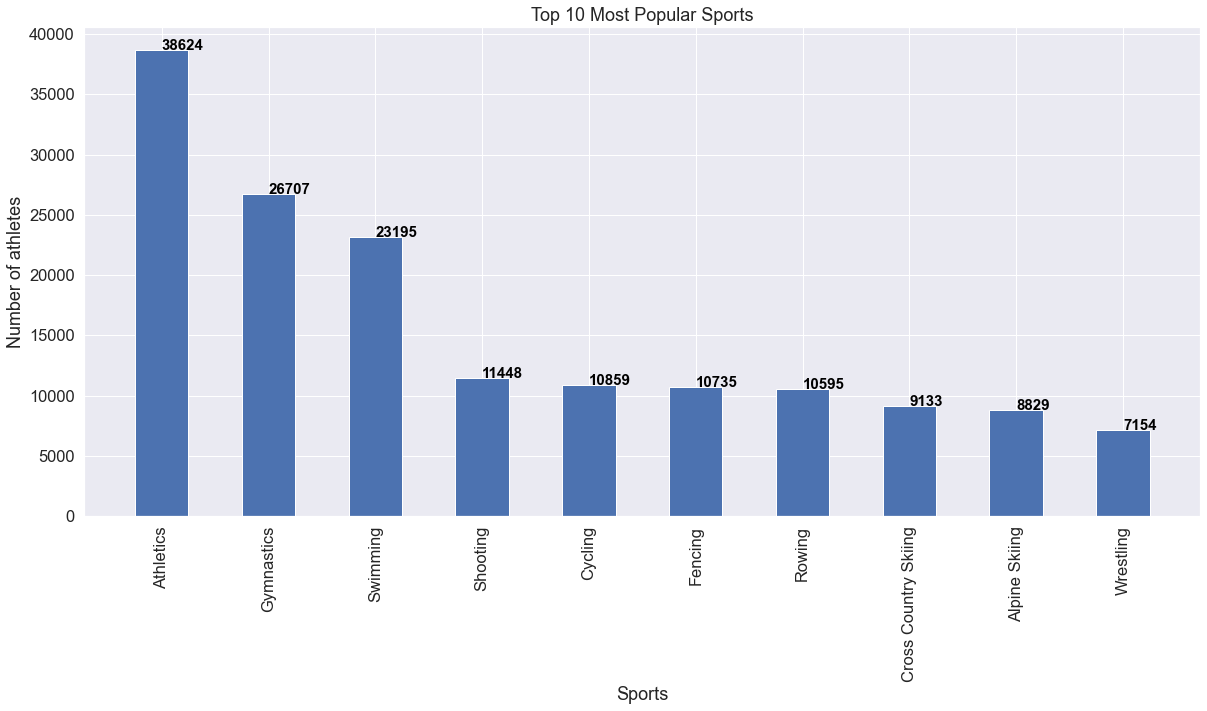

In [61]:
# Get the Graph for Top 10 Sports are most popular 
y = Top_10_Sport.head(10).values 
x = Top_10_Sport.head(10).index
plt.figure(figsize=(20,9))
plt.bar(x,y,width=0.5)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='black',size=15,fontweight='bold')
plt.xlabel("Sports")
plt.ylabel("Number of athletes")
plt.title("Top 10 Most Popular Sports")
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#To see what are the TOP 10 countries have most athletes and how many, that could have relationship on why some contries can do well do some sports. 
Top_10=olympics_df.region.value_counts()
Top_10.head(10) 

United States     18853
Germany           15883
France            12758
United Kingdom    12256
Russia            11692
Italy             10715
Canada             9734
Japan              8444
Sweden             8339
Australia          7724
Name: region, dtype: int64

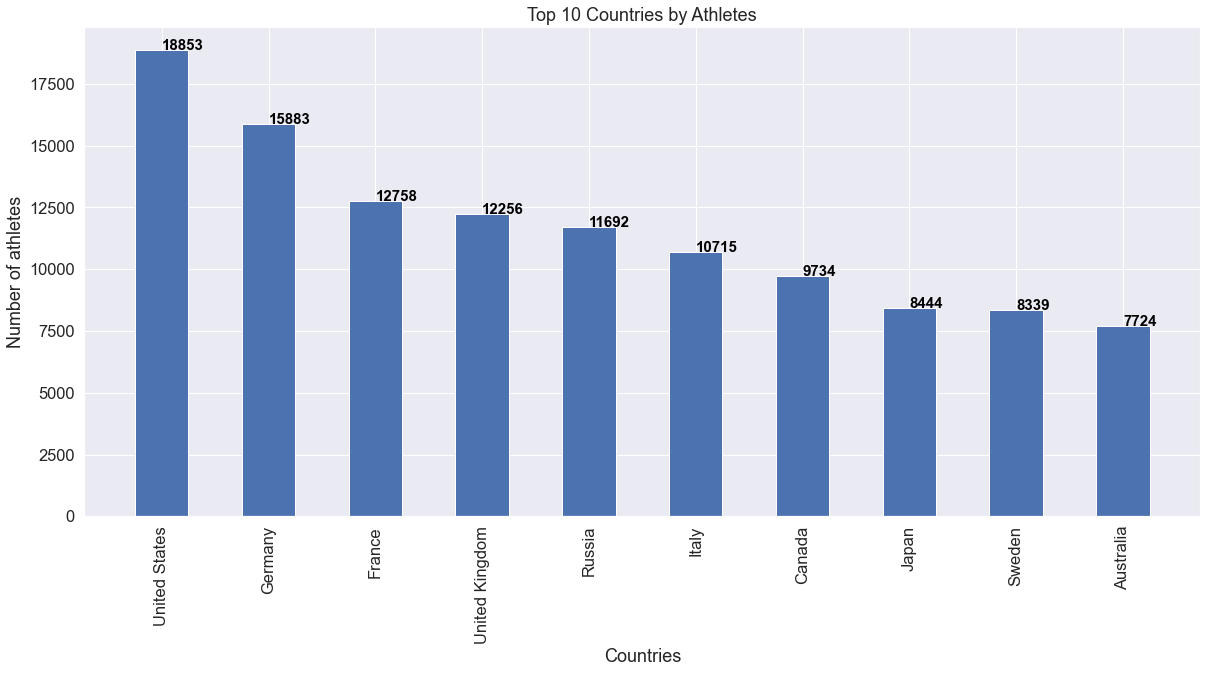

In [63]:
# Get the Graph for The TOP 10 countries have most athletes
y = Top_10.head(10).values 
x = Top_10.head(10).index
plt.figure(figsize=(20,9))
plt.bar(x,y,width=0.5)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='black',size=15,fontweight='bold')
plt.xlabel("Countries")
plt.ylabel("Number of athletes")
plt.title("Top 10 Countries by Athletes")
plt.xticks(rotation='vertical')
plt.show()

In [64]:
#Shows How many Medals
olympics_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [65]:
olympics_df = pd.concat([olympics_df,pd.get_dummies(olympics_df.Medal)],axis=1)

In [66]:
#Using get_dummies method.
# Adding "Medals" 
olympics_df['Total_Medals'] = olympics_df['Bronze'] + olympics_df['Gold'] + olympics_df['Silver'] 
olympics_df.head()

,Name,Sex,Age,Height,Weight,NOC,region,Year,Season,Games,City,Host_Country,Sport,Medal,Is Host,Bronze,Gold,Silver,Total_Medals
0,A Dijiang,M,24.0,180.0,80.0,CHN,China,1992,Summer,1992 Summer,Barcelona,Spain,Basketball,NaN,False,0,0,0,0
1,A Lamusi,M,23.0,170.0,60.0,CHN,China,2012,Summer,2012 Summer,London,United Kingdom,Judo,NaN,False,0,0,0,0
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,1920,Summer,1920 Summer,Antwerpen,Belgium,Football,NaN,False,0,0,0,0
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,1900,Summer,1900 Summer,Paris,France,Tug-Of-War,Gold,False,0,1,0,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,1988,Winter,1988 Winter,Calgary,Canada,Speed Skating,NaN,False,0,0,0,0


In [67]:
groupcountry = olympics_df.groupby(by=['region'],as_index= False).sum()

In [68]:
Top10region = groupcountry.sort_values(by=['Total_Medals'],ascending = False).head(10)

In [69]:
Top10region

,region,Age,Height,Weight,Year,Is Host,Bronze,Gold,Silver,Total_Medals
194,United States,483369.0,2622879.0,1.038127e+06,37142720,4027,1358.0,2638.0,1641.0,5637.0
151,Russia,288717.0,1849379.0,7.470240e+05,23213156,1013,1178.0,1599.0,1170.0,3947.0
67,Germany,403556.0,2357036.0,9.517005e+05,31397176,1689,1260.0,1301.0,1195.0,3756.0
193,United Kingdom,309697.0,1395588.0,5.591310e+05,24084678,2246,651.0,678.0,739.0,2068.0
63,France,305714.0,1449532.0,5.584635e+05,25061872,2077,666.0,501.0,610.0,1777.0
87,Italy,267077.0,1410280.0,5.482030e+05,21169844,785,531.0,575.0,531.0,1637.0
176,Sweden,223553.0,967471.0,3.903745e+05,16378294,732,535.0,479.0,522.0,1536.0
33,Canada,239285.0,1422397.0,5.661365e+05,19294400,1029,451.0,463.0,438.0,1352.0
10,Australia,189698.0,1196549.0,4.809030e+05,15346152,1193,522.0,368.0,459.0,1349.0
78,Hungary,163845.0,831216.0,3.396695e+05,13010272,0,371.0,432.0,332.0,1135.0


/Users/sabrina8654/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 10 Countries with maximum medals')

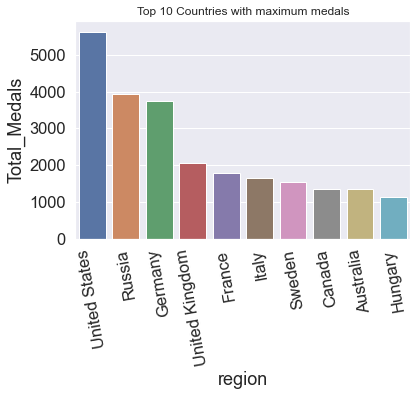

In [70]:
Top10Medals = sns.barplot('region','Total_Medals',data=Top10region).set_xticklabels(Top10region.region,rotation=100)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Top 10 Countries with maximum medals')

In [71]:
groupsport = olympics_df.groupby(by=['Sport','region'],as_index=False).sum()

In [72]:
tops = pd.DataFrame()
sp = olympics_df.Sport.unique()
for i in sp:
   tops = pd.concat([tops,groupsport[groupsport['Sport'] == i].sort_values(by=['Total_Medals'],ascending= False).head(1)])

In [73]:
tops = tops[['Sport','region','Gold','Silver','Bronze','Total_Medals']]
spotop=tops.sort_values(by="Total_Medals",ascending=False)
spotop.head(25)

,Sport,region,Gold,Silver,Bronze,Total_Medals
435,Athletics,United States,542.0,317.0,221.0,1080.0
2900,Swimming,United States,649.0,254.0,175.0,1078.0
2221,Rowing,Germany,272.0,92.0,107.0,471.0
1707,Gymnastics,Russia,176.0,142.0,81.0,399.0
1380,Fencing,Italy,151.0,136.0,72.0,359.0
1812,Ice Hockey,Canada,220.0,93.0,35.0,348.0
583,Basketball,United States,281.0,24.0,36.0,341.0
1793,Hockey,Netherlands,80.0,87.0,88.0,255.0
912,Canoeing,Germany,104.0,71.0,54.0,229.0
3360,Volleyball,Russia,93.0,90.0,36.0,219.0


In [74]:
#len(olympics_df.loc[(olympics_df['Sport'] == 'Fencing') & (olympics_df['NOC'] == 'USA')])/len(olympics_df.loc[(olympics_df['Sport'] == 'Fencing')])

In [75]:
popular_sports = pd.concat([spotop[spotop['Sport']=='Athletics'], spotop[spotop['Sport']=='Gymnastics'], spotop[spotop['Sport']=='Swimming'], spotop[spotop['Sport']=='Shooting'], spotop[spotop['Sport']=='Cycling'],
                            spotop[spotop['Sport']=='Fencing'], spotop[spotop['Sport']=='Rowing'], spotop[spotop['Sport']=='Cross Country Skiing'], spotop[spotop['Sport']=='Alpine Skiing'], spotop[spotop['Sport']=='Wrestling']])

In [76]:
popular_sports = popular_sports.sort_values(by='region', ascending=False)
popular_sports

,Sport,region,Gold,Silver,Bronze,Total_Medals
435,Athletics,United States,542.0,317.0,221.0,1080.0
2900,Swimming,United States,649.0,254.0,175.0,1078.0
2540,Shooting,United States,117.0,36.0,40.0,193.0
1191,Cycling,United Kingdom,59.0,68.0,55.0,182.0
1707,Gymnastics,Russia,176.0,142.0,81.0,399.0
1032,Cross Country Skiing,Russia,73.0,51.0,48.0,172.0
3647,Wrestling,Russia,97.0,52.0,43.0,192.0
1380,Fencing,Italy,151.0,136.0,72.0,359.0
2221,Rowing,Germany,272.0,92.0,107.0,471.0
7,Alpine Skiing,Austria,34.0,39.0,41.0,114.0


Text(0.5, 1.0, 'Countries performance on top 10 popular sports')

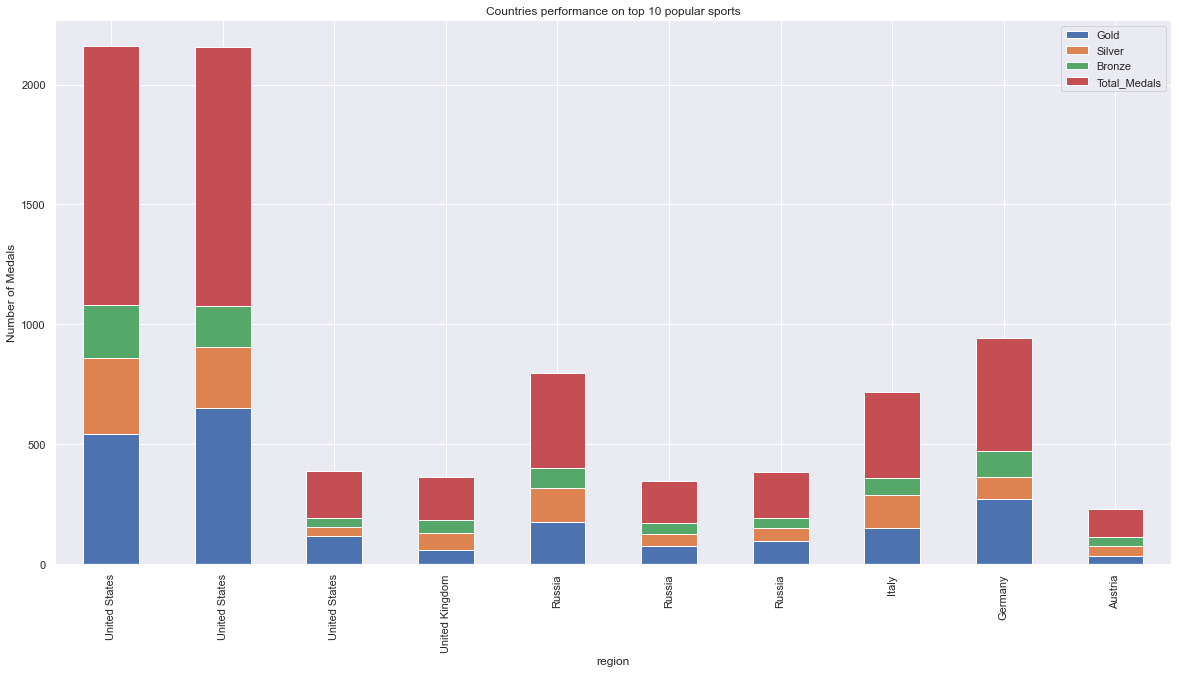

In [77]:
ax=popular_sports.plot.bar(x='region', stacked=True, xlabel='region', ylabel='Number of Medals') 
plt.title('Countries performance on top 10 popular sports')